# Data Analysis Assignment 2

## Annika Stechemesser 1664383



## Question 5.1 Analysis of exo-planet data

#### We download the  exoplanet-data dataset. The dataset has two colums, the first one is the time measured in days and the second one the flux coming from the star. We extract the data and prepare it for analysation by removing "n/a" values. We then plot the data  to get a first overview.


In [8]:
using PyPlot
using Distributions;

In [540]:
data=readdlm("exoplanet-data.txt");

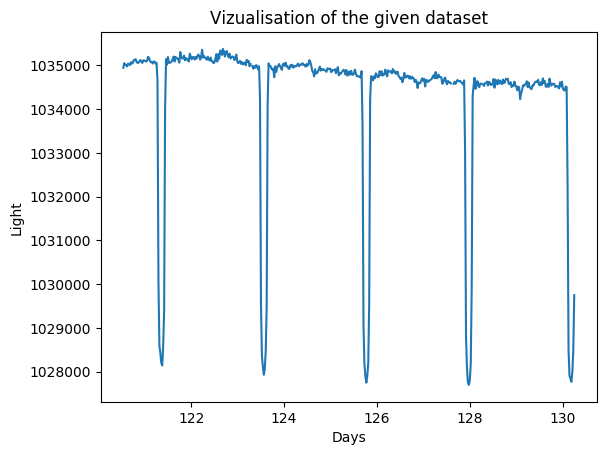

In [498]:
Days=data[:,1]
Days=filter!(e->e !="n/a",Days)
Light=data[:,2]
Light=filter!(e->e !="n/a",Light)
plot(Days,Light)
xlabel("Days")
ylabel("Light")
title("Vizualisation of the given dataset");

#### We see that we have a lot of noisy data in the top of the dataset which is the flux coming from the star when it is unobstructed. The dips we see are the diminished flux if the planet is transiting the star. 

#### All the methods we want to use to analyse the dataset are written to be generic enough to accomodate generic planet-transition-datasets. We only plot the data to get an overview.

### Answer to Question 5.1 Part A

#### We want to estimate the orbital period of the planet. To do that we need to find the minima of the transition dips and then average over the time distances between them. To find the desired minima, we first set a threshold which we define as the average of the distance of the global maximum and global minimum of the data. We identify all values below that threshold. 

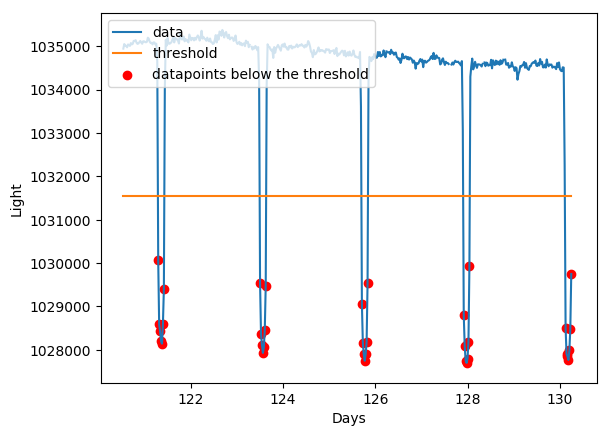

In [502]:
#set a threshhold

max_L=findmax(Light)
max_L=max_L[1]

min_L=findmin(Light)
min_L=min_L[1]

thresh=(max_L+min_L)/2
plot(Days,Light,label="data")
v=ones(length(Days)).*thresh
plot(Days,v,label="threshold")

#identify the values below it
Sub_light=find(x->(x<thresh),Light)  
scatter(Days[Sub_light],Light[Sub_light],c=[1,0,0],label="datapoints below the threshold")
legend(loc=2)
xlabel("Days")
ylabel("Light");



#### Now we need to identify the different dips (planet transitions) and identify the minimum in each one. The array "Sub_light" is an array with indices of all the values that lie below the threshold. Values contained in the same dip will have indices that lie close together. We're therefore looking for jumps in the index array. We identify a value as belonging the same dip if the difference of their indices is one. Using this method, we can assign all of the values (red dots) to the corresponding dips and find the minimum in each dip. 

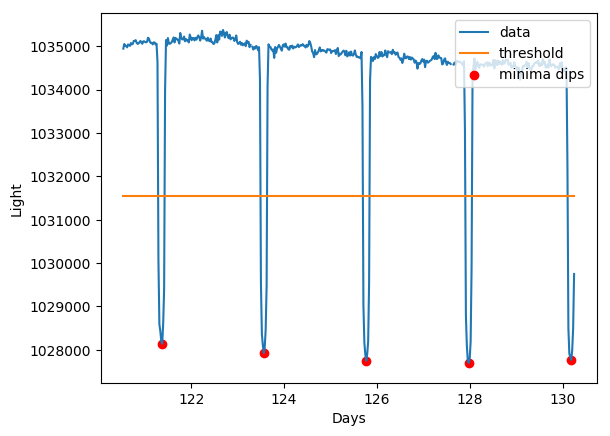

In [539]:
mins_light=zeros(0)
mins_time=zeros(0)
mins_index=zeros(0)
tmp=zeros(Int,0)
for i=1:length(Sub_light)
    append!(tmp,Sub_light[i])
    if i<length(Sub_light)
        if Sub_light[i]+1<Sub_light[i+1]
            idx=findmin(Light[tmp])[2]
            idx=tmp[idx]
            append!(mins_index,idx)
            localmin_time=Days[idx]
            localmin_light=Light[idx]
            append!(mins_light,localmin_light)
            append!(mins_time,localmin_time)
            tmp=zeros(Int,0)
        end
    end
    if i==length(Sub_light)
        idx=findmin(Light[tmp])[2]
        idx=tmp[idx]
        append!(mins_index,idx)
        localmin_time=Days[idx]
        localmin_light=Light[idx]
        append!(mins_light,localmin_light)
        append!(mins_time,localmin_time)
        tmp=zeros(Int,0)
    end
end

plot(Days,Light,label="data")
plot(Days,v,label="threshold")
scatter(mins_time,mins_light,c=[1,0,0],label="minima dips")
legend(loc=1)
xlabel("Days")
ylabel("Light");


#### We now take the extremes of our minima (furthest left and furthest right) and devide by the number transits to get the orbital period. We estimate it to be circa 2.2 days.

In [348]:
c=length(mins_time)
orb_per=(mins_time[c]-mins_time[1])/(c-1)

## The estimated orbital period is 2.2 days.

2.2017997215898504

### Answer to Question 5.1 Part B

#### We assume the flux from the sun is proportional to its area. We want to estimate the radtio of the planet and the solar radii. To do that we need to calculate an estimate for the unobstructed flux and and for the flux during the planet transition periods. To identify the data corresponding for the unobstructed flux we use our earlier defined threshold again. We identify all the datapoints above it as part of the unobstructed flux.

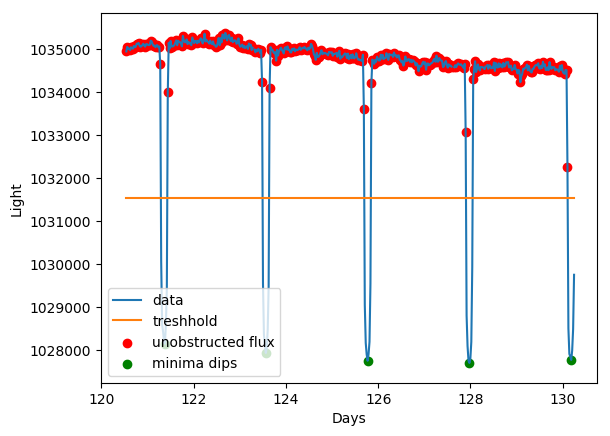

PyObject <matplotlib.text.Text object at 0x7f22d7413fd0>

In [537]:
## get the star planet ratio
## to do that we need to find the beginning of the transit period

Sub_light_2=find(x->(x>thresh),Light)
plot(Days,Light,label="data")
v=ones(length(Days)).*thresh
plot(Days,v, label="treshhold")

scatter(Days[Sub_light_2],Light[Sub_light_2],c=[1,0,0],label="unobstructed flux")
## get all the points above the threshold
scatter(mins_time,mins_light,c=[0, 0.5, 0],label="minima dips")
legend()
xlabel("Days")
ylabel("Light")

#### As an estimate for the unobstructed flux we use the median to minimise the bias in our estimate that we get from outliers. We then also use the median as an estimate for the flux during the transit. We then get the ratio of the planetary and the star radii by taking the squareroot of the difference of the two estimates over the unobstructed flux mean. The estimated ratio is circa 0.0827. We can therefore conclude that the planet is quite big.

In [513]:
m_up=median(Light[Sub_light_2])
m_down=median(mins_light)

ratio_planet_star=sqrt((m_up-m_down)/(m_up))

0.08273859323213652

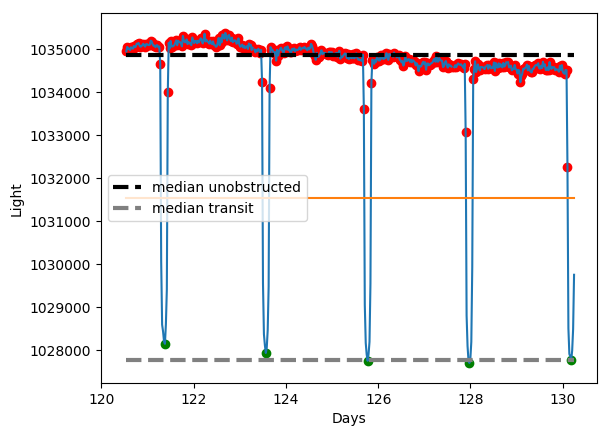

In [532]:
plot(Days,Light)
plot(Days,v)
scatter(Days[Sub_light_2],Light[Sub_light_2],c=[1,0,0])
scatter(mins_time,mins_light,c=[0,0.5,0])
plot(Days,ones(length(Days))*m_up,c=[0,0,0],linestyle="--",label="average planet transit",lw=3,label="median unobstructed")
plot(Days,ones(length(Days))*m_down,c=[0.5,0.5,0.5],linestyle="--",label="average planet transit",lw=3,label="median transit")
legend()
xlabel("Days")
ylabel("Light");

### Answer to Question 5.1 Part C

#### We finally want to estimate the transit time in days. To do that we need to identify the last values in the unobstructed flux before the function has a dip and the first value in the unobstructed flux after the dip. It will be useful to define a threshhold as close as possible to the unobstructed flux. We want to extract an appropriate threshold from the data. To do that we calculcate the standard deviation of the datapoints we earlier identified as belonging to the unobstructed flux. We then take the median of these minus the standard diviation as our updated threshold. 

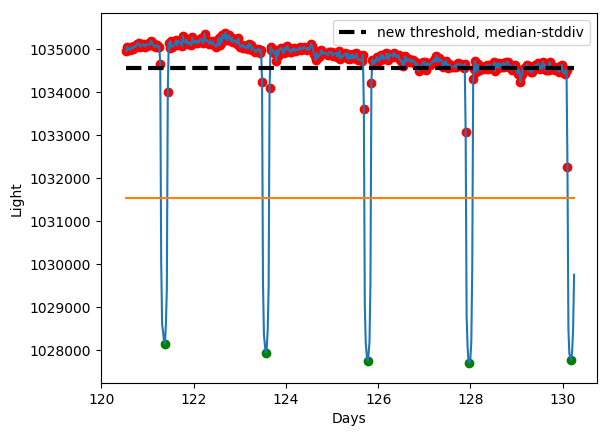

In [531]:
#better threshold / using std diviation

σ=std(Light[Sub_light_2])

plot(Days,Light)
plot(Days,v)
scatter(Days[Sub_light_2],Light[Sub_light_2],c=[1,0,0])
scatter(mins_time,mins_light,c=[0,0.5,0])
plot(Days,(ones(length(Days))*m_up).-σ,c=[0,0,0],linestyle="--",label="new threshold, median-stddiv",lw=3)
legend()
xlabel("Days")
ylabel("Light");

#### We now want to identify the beginning and the endpoint of each transit period. Coming from the minima of the dips, we check the data points left and right of each minimum. We take the first value on the left that is bigger than our updated threshold and the first value on the right that is bigger than the updated threshold. We only accept values that are below the initial threshold because we want to avoid the case in which our dataset ends in a dip or we have some other data issues we haven't identified yet. We also only accept transit beginnings and ends if they come in pairs. This method gives us the transit beginning- and endpoints as plotted below.

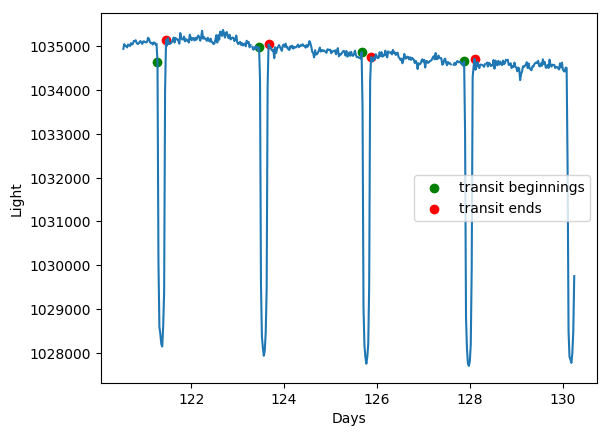

In [535]:
transit_beginning=zeros(0)
transit_end=zeros(0)
for i=1:5
    a=mins_index[i]
    a=Int(a)
    b=a
    while(Light[a]<(m_up-σ) && a>1)
    a=a-1
    end
    while(Light[b]<(m_up-σ) && b < length(Light))
    b=b+1
    end
    
    if Light[a]>thresh && Light[b]>thresh
    append!(transit_beginning,a)
    append!(transit_end,b)
    end
end
transit_beginning=Int.(transit_beginning)
plot(Days,Light)
scatter(Days[transit_beginning],Light[transit_beginning],c=[0,0.5,0],label="transit beginnings")
transit_end=Int.(transit_end)
scatter(Days[transit_end],Light[transit_end],c=[1,0,0],label="transit ends")
xlabel("Days")
ylabel("Light")
legend();

#### To get the transit time, we take the difference of the beginning times and the end times and average over these. The estimated transit time is circa 0.2 days.

In [536]:
transit_time=mean(Days[transit_end]-Days[transit_beginning])

0.20434336789730878

## Question 5.2 Simulation of an autoregressive model

#### In this question we want to simulate a first order autoregressive model. For the parameters we choose c=1, $\phi$=0.5 and $\sigma_{\epsilon}$ =1. We run the simulation 5000 times.

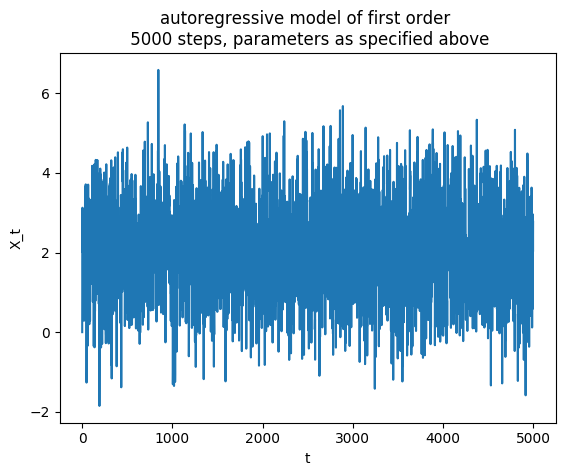

In [484]:
#Question 5.2 
N=5000
c=1
X=zeros(N)
ϕ=0.5
σ=1
d1 = Normal(0.0, σ) #choose a normal distribution with mean mu and variance sigma^2
ϵ = rand(d1, N)

for i=1:N-1
X[i+1]=c+ϕ*X[i]+ϵ[i]
end

x=1:1:5000
plot(x,X)
title("autoregressive model of first order \n 5000 steps, parameters as specified above")
xlabel("t")
ylabel("X_t");

#### We measure the mean and the variance and compare them to our theoretical predictions. To calculate the latter, we implement the formulas known from the lecture.

In [485]:
m=mean(X)

theo_m=c/(1-ϕ)

println(m)
println(theo_m)
error_mean=abs(m-theo_m)

2.0422106510120797
2.0


0.04221065101207966

In [486]:
v=var(X)

theo_v=(σ^2)/(1-(ϕ^2))

println(v)
println(theo_v)
error_var=abs(v-theo_v)

1.2752439533448507
1.3333333333333333


0.058089379988482515

#### We observe that mean and variance are both fairly close to the theoretical prediction. The precision is also dependent on the randomly generated data we're working with. For all observed samples, the error was always smaller than 0.1.

#### Next we want to extract the autocovariance from the data and compare it to the theoretical prediction. To do that we define a function "offset" that takes as input our timesteps and the desired offset value n. It then shifts the first n values of the vector to the bottom and the rest of them up. Doing this for values from -2500 to 2500, we get can extract the autocovariance. As expected it is highest around 0. Finally we compare our result with the theoretical prediction from the lecture notes, which we implemented.

In [489]:
# offsetting the time series 

function offset(X,n)
    L=length(X)
    if n<0
        n2=L+n
    end
    if n>=0
        n2=n
    end
    Y=zeros(L)
    Y[1:(L-n2)]=X[n2+1:L]
    Y[(L-n2+1):L]=X[1:n2]
    return Y    
    end;
    

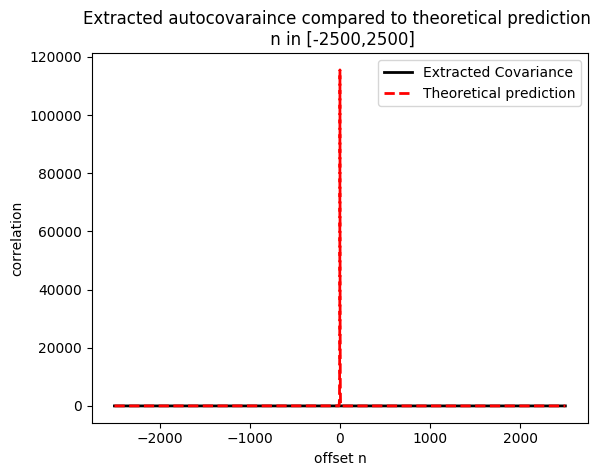

In [542]:
#calculating the autocovariance from the data
Auto_cov=zeros(N)
counter=1
min=Int(floor(-N/2))
max=Int(floor(N/2))-1
for i=min:max
    shuffle=offset(X,i)
    Auto_cov[counter]=mean((shuffle-mean(X)).*(X-mean(X)))
    counter=counter+1
end

x_cov=min:max
plot(x_cov,Auto_cov,lw=2,c=[0,0,0],label="Extracted Covariance")

#calculating the autocovariance using the theoretical prediction
Auto_theo=zeros(N)
min=Int(floor(-N/2))
max=Int(floor(N/2))-1
counter=1
for i=min:max
    Auto_theo[counter]=(ϕ^abs(i))*(σ^2)/(1-(ϕ^2))
    counter=counter+1
end
plot(x_cov,Auto_theo,linestyle="--",c=[1,0,0],lw=2,label="Theoretical prediction")
xlabel("offset n")
ylabel("correlation")
legend(loc=1)
title("Extracted autocovaraince compared to theoretical prediction \n n in [-2500,2500]");


#### We get the impression that the theoretical prediction matches the extracted autocovariance quite well. To get a better idea of what happens around 0, we zoom in on our plot. We see that the theoretical prediction is also around 0 a good approximation for the extracted autocovariance.

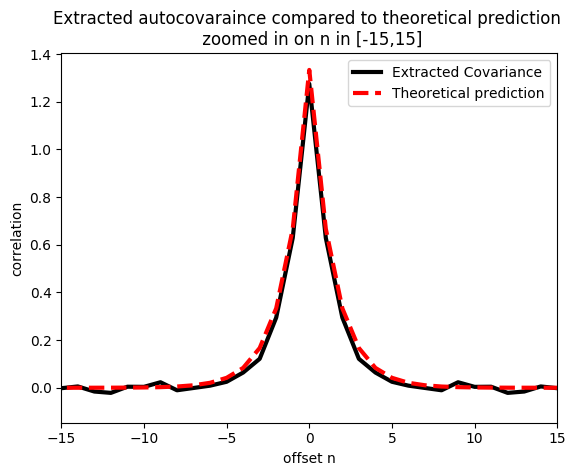

In [493]:
plot(x_cov,Auto_cov,lw=3,c=[0,0,0],label="Extracted Covariance")
plot(x_cov,Auto_theo,linestyle="--",c=[1,0,0],lw=3, label="Theoretical prediction")
xlim(-15,15)
legend(loc=1)
xlabel("offset n")
ylabel("correlation")
title("Extracted autocovaraince compared to theoretical prediction \n zoomed in on n in [-15,15]");